# Clasificación Básica: Predecir una imagen de moda

Esta Guia entrena un modelo de red neuronal para clasificar imagenes de ropa como, tennis y camisetas.

Esta Guia usa [tf.keras](https://www.tensorflow.org/guide/keras), un API de alto nivel para construir y entrenar modelos en Tensorflow.

## Importar el set de datos de moda de MNIST

Esta guia usa el set de datos de [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist)
que contiene mas de 70,000 imagenes en 10 categorias. Las imagenes muestran articulos individuales de ropa a una resolucion baja (28 por 28 pixeles) como se ve aca:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Para importar y cargar el set de datos de MNIST directamente de TensorFlow:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras

In [2]:
dataset = keras.datasets.fashion_mnist
dataset.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [3]:
(X_train, y_train), (X_test, y_test) = dataset.load_data()

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


La *class* de ropa que la imagen representa.

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Cada imagen es mapeada a una unica etiqueta. Ya que los *Class names* no estan incluidos en el dataset. Los guardamos en la siguiente lista:

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
len(class_names)

10

## Explore el set de datos

* ¿Cuántas imágenes hay en train?
* ¿Y en test?
* ¿De cuántos pixels se compone cada imagen?
* ¿Cuáles son los valores de los labels?

In [7]:
# Cantidad de imágenes en train
print(f"Imágenes en entrenamiento: {len(X_train)}")

# Cantidad de imágenes en test
print(f"Imágenes en test: {len(X_test)}")

# Pixels por imagen
print(f"Shape de una imagen de train: {X_train[0].shape}")
print(f"Shape de una imagen de test: {X_test[0].shape}")
print(f"Total de pixels por imagen: {X_train[0].shape[0] * X_train[0].shape[1]}")

# Valores de los labels
print(f"Labels únicos en train: {np.unique(y_train)}")
print(f"Labels únicos en test: {np.unique(y_test)}")
print(f"Rango de valores en train: {y_train.min()} - {y_train.max()}")

# Distribución de clases
print(f"Distribución de clases en train:")
unique, counts = np.unique(y_train, return_counts=True)
for label, count in zip(unique, counts):
    print(f"  Clase {label} ({class_names[label]}): {count} imágenes")


Imágenes en entrenamiento: 60000
Imágenes en test: 10000
Shape de una imagen de train: (28, 28)
Shape de una imagen de test: (28, 28)
Total de pixels por imagen: 784
Labels únicos en train: [0 1 2 3 4 5 6 7 8 9]
Labels únicos en test: [0 1 2 3 4 5 6 7 8 9]
Rango de valores en train: 0 - 9
Distribución de clases en train:
  Clase 0 (T-shirt/top): 6000 imágenes
  Clase 1 (Trouser): 6000 imágenes
  Clase 2 (Pullover): 6000 imágenes
  Clase 3 (Dress): 6000 imágenes
  Clase 4 (Coat): 6000 imágenes
  Clase 5 (Sandal): 6000 imágenes
  Clase 6 (Shirt): 6000 imágenes
  Clase 7 (Sneaker): 6000 imágenes
  Clase 8 (Bag): 6000 imágenes
  Clase 9 (Ankle boot): 6000 imágenes


## Pre-procese el set de datos

Inspecciona y representa la primera imagen del dataset de train. Para ello, utiliza la función `imshow` de matplotlib.

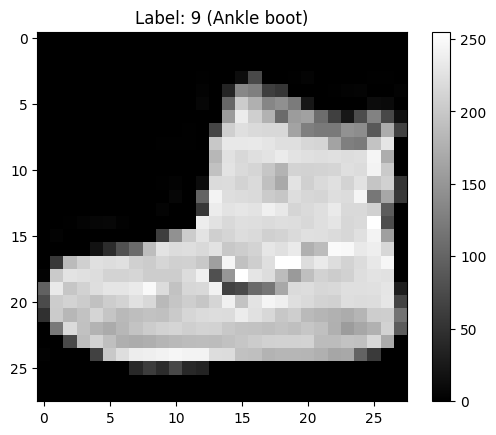

In [ ]:
# Vemos la primera imagen de train con imshow
plt.imshow(X_train[0], cmap='gray') # cmap='gray' para escala de grises
plt.colorbar() # Muestra la barra de colores
plt.title(f"Label: {y_train[0]} ({class_names[y_train[0]]})")
plt.show()


Escala los conjuntos de train y test para que vayan del 0 al 1. No hace falta usar ninguna librería. Con realizar una división en cada conjunto será suficiente.

In [9]:
# Escalamos los conjuntos de train y test a [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0
print(f"Valor mínimo en X_train: {X_train.min()}")
print(f"Valor máximo en X_train: {X_train.max()}")
print(f"Valor mínimo en X_test: {X_test.min()}")
print(f"Valor máximo en X_test: {X_test.max()}")

Valor mínimo en X_train: 0.0
Valor máximo en X_train: 1.0
Valor mínimo en X_test: 0.0
Valor máximo en X_test: 1.0


Para verificar que el set de datos está en el formato adecuado y que están listos para construir y entrenar la red, vamos a desplegar las primeras 25 imágenes del *training set* y despleguemos el nombre de cada clase debajo de cada imagen.

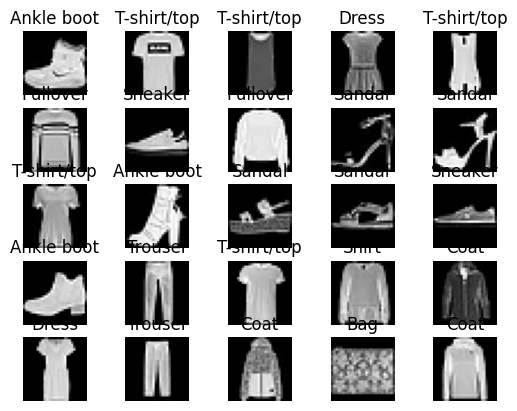

In [14]:
# 25 primeras imágenes del training set
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(class_names[y_train[i]])
    plt.axis('off')
plt.show()


## Construir el Modelo

Construir la red neuronal requiere configurar las capas del modelo y luego compilar el modelo.

### Configurar las Capas
Construye todas las capas del modelo.

In [16]:
# Capas del modelo
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # Aplana la imagen 28x28 a un vector de 784
    keras.layers.Dense(128, activation='relu'),  # Capa oculta con 128 neuronas y ReLU
    keras.layers.Dense(10, activation='softmax') # Capa de salida con 10 neuronas (una por clase) y softmax
])


### Compila el modelo

Antes de que el modelo este listo para entrenar , se necesitan algunas configuraciones más. Estas son agregadas durante el paso de compilacion del modelo:

* *Loss function* —Esto mide que tan exacto es el modelo durante el entrenamiento. Quiere minimizar esta función para dirigir el modelo en la dirección adecuada.
* *Optimizer* — Esto es cómo el modelo aprende basado en el set de datos que ve y la función de pérdida.
* *Metrics* — Se usan para monitorear los pasos de entrenamiento y de pruebas.


Como es un problema de clasificación multiclase, tendrás que usar `sparse_categorical_crossentropy` como función de coste. En cuanto a las métricas, usa simplemente `accuracy`.

In [17]:
# Compilación
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



## Entrenar el Modelo
Empieza entrenándolo con 10 epochs. Prueba con más

In [20]:
# Entrenamiento con 10 epochs
history_10 = model.fit(X_train, y_train, epochs=10, validation_split=0.2)

# Entrenamiento con 50 epochs
history_50 = model.fit(X_train, y_train, epochs=50, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9215 - loss: 0.2092 - val_accuracy: 0.8870 - val_loss: 0.3548
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9238 - loss: 0.2041 - val_accuracy: 0.8907 - val_loss: 0.3179
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9257 - loss: 0.1975 - val_accuracy: 0.8824 - val_loss: 0.3445
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9260 - loss: 0.1912 - val_accuracy: 0.8863 - val_loss: 0.3502
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9301 - loss: 0.1855 - val_accuracy: 0.8882 - val_loss: 0.3482
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9310 - loss: 0.1821 - val_accuracy: 0.8923 - val_loss: 0.3320
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9338 - loss: 0.1756 - val_accuracy: 0.8879 - val_loss: 0.3516
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9360 - loss: 0.1718 

## Evaluar Accuracy
Prueba el rendimiento del modelo con los datos de test

In [21]:
# Rendimiento en test
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"\nPrecisión en test: {test_acc:.4f}")

313/313 - 2s - 7ms/step - accuracy: 0.8812 - loss: 0.6671

Precisión en test: 0.8812


## Hacer predicciones

Con el modelo entrenado puedes usarlo para hacer predicciones sobre imagenes.

In [23]:
# Predicciones sobre imagenes
predictions = model.predict(X_test)
print(f"Predicciones shape: {predictions.shape}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Predicciones shape: (10000, 10)


El modelo ha predicho la etiqueta para cada imagen en el set de datos de *test* (prueba). Miremos la primera prediccion:

In [24]:
# Etiquetas predichas para las primeras 5 imágenes de test
predicted_labels = np.argmax(predictions, axis=1)
print(f"Etiquetas predichas para las primeras 5 imágenes de test: {predicted_labels[:5]}")
print(f"Etiquetas reales para las primeras 5 imágenes de test: {y_test[:5]}")


Etiquetas predichas para las primeras 5 imágenes de test: [9 2 1 1 0]
Etiquetas reales para las primeras 5 imágenes de test: [9 2 1 1 6]


*Una* prediccion es un array de 10 numeros. Estos representan el nivel de "confianza" del modelo sobre las imagenes de cada uno de los 10 articulos de moda/ropa. Puedes revisar cual tiene el nivel mas alto de confianza:

In [26]:
# Nivel de confianza de las predicciones para las primeras 5 imágenes
for i in range(5):
    print(f"Imagen {i+1}:")
    for j in range(10):
        if predictions[i][j] > 0.01:  # Mostrar solo si la probabilidad es mayor a 1%
            print(f"  Clase {j} ({class_names[j]}): {predictions[i][j]:.4f}")


Imagen 1:
  Clase 9 (Ankle boot): 1.0000
Imagen 2:
  Clase 2 (Pullover): 1.0000
Imagen 3:
  Clase 1 (Trouser): 1.0000
Imagen 4:
  Clase 1 (Trouser): 1.0000
Imagen 5:
  Clase 0 (T-shirt/top): 0.9293
  Clase 6 (Shirt): 0.0707


Entonces, el modelo tiene mayor confianza que esta imagen es un bota de tobillo "ankle boot" o `class_names[9]`. Examinando las etiquetas de *test* o de pruebas muestra que esta clasificación es correcta:

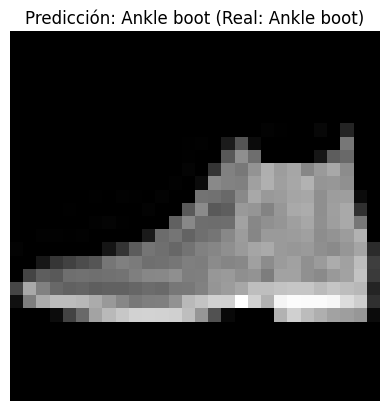

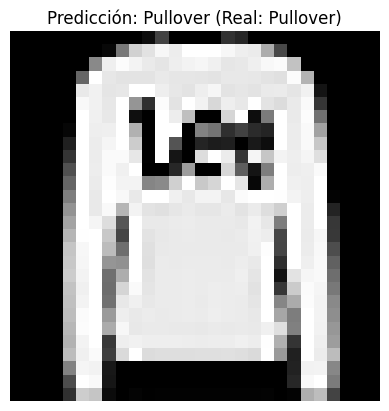

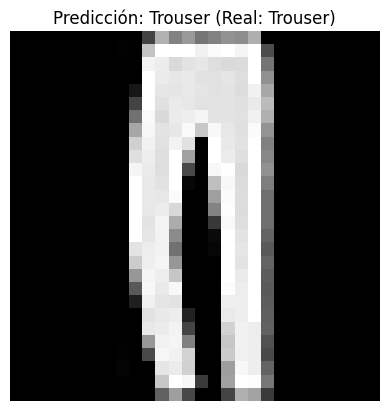

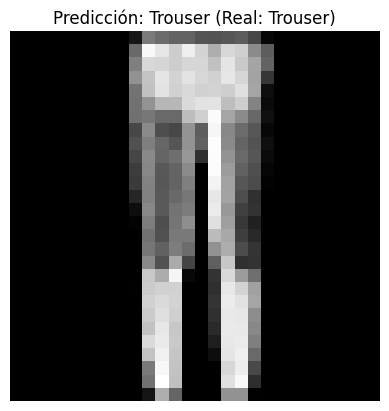

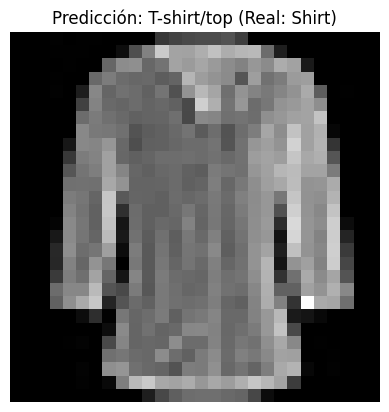

In [27]:
# Examinar las etiquetas de test
for i in range(5):
    plt.imshow(X_test[i], cmap='gray')
    plt.title(f"Predicción: {class_names[predicted_labels[i]]} (Real: {class_names[y_test[i]]})")
    plt.axis('off')
    plt.show()

**Grafica** esto para poder ver todo el set de la prediccion de las 10 clases.

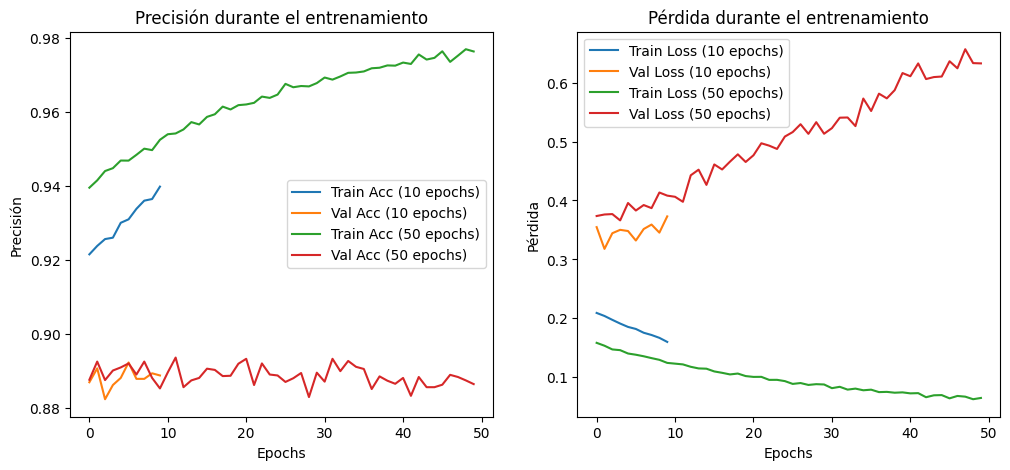

In [28]:
# Gráfica de precisión y pérdida
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_10.history['accuracy'], label='Train Acc (10 epochs)')
plt.plot(history_10.history['val_accuracy'], label='Val Acc (10 epochs)')
plt.plot(history_50.history['accuracy'], label='Train Acc (50 epochs)')
plt.plot(history_50.history['val_accuracy'], label='Val Acc (50 epochs)')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Epochs')
plt.ylabel('Precisión')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history_10.history['loss'], label='Train Loss (10 epochs)')
plt.plot(history_10.history['val_loss'], label='Val Loss (10 epochs)')
plt.plot(history_50.history['loss'], label='Train Loss (50 epochs)')
plt.plot(history_50.history['val_loss'], label='Val Loss (50 epochs)')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Epochs')
plt.ylabel('Pérdida')
plt.legend()
plt.show()


Miremos la imagen [0], sus predicciones y el array de predicciones. Las etiquetas de predicción correctas estan en azul y las incorrectas están en rojo. El número entrega el porcentaje (sobre 100) para la etiqueta predecida.

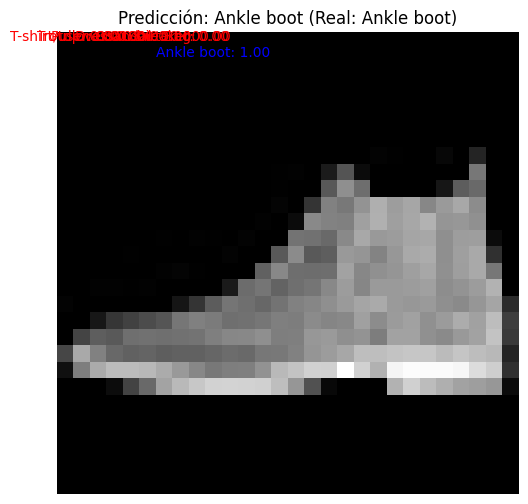

In [29]:
# Visualizar la imagen [0] y sus predicciones
plt.figure(figsize=(6, 6))
plt.imshow(X_test[0], cmap='gray')
plt.title(f"Predicción: {class_names[predicted_labels[0]]} (Real: {class_names[y_test[0]]})")
plt.axis('off')

# Mostrar el array de predicciones
pred_array = predictions[0]
for i in range(10):
    color = 'blue' if i == predicted_labels[0] else 'red'
    plt.text(i, pred_array[i], f"{class_names[i]}: {pred_array[i]:.2f}", color=color, ha='center')

plt.show()

Vamos a graficar multiples imagenes con sus predicciones. Notese que el modelo puede estar equivocado aun cuando tiene mucha confianza.

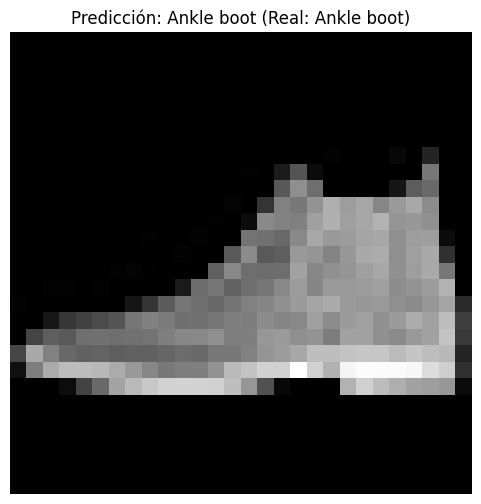

In [30]:
# Imagen y predicción
plt.figure(figsize=(6, 6))
plt.imshow(X_test[0], cmap='gray')
plt.title(f"Predicción: {class_names[predicted_labels[0]]} (Real: {class_names[y_test[0]]})")
plt.axis('off')
plt.show()


Evalúa tu modelo con una matriz de confusión e interprétala.

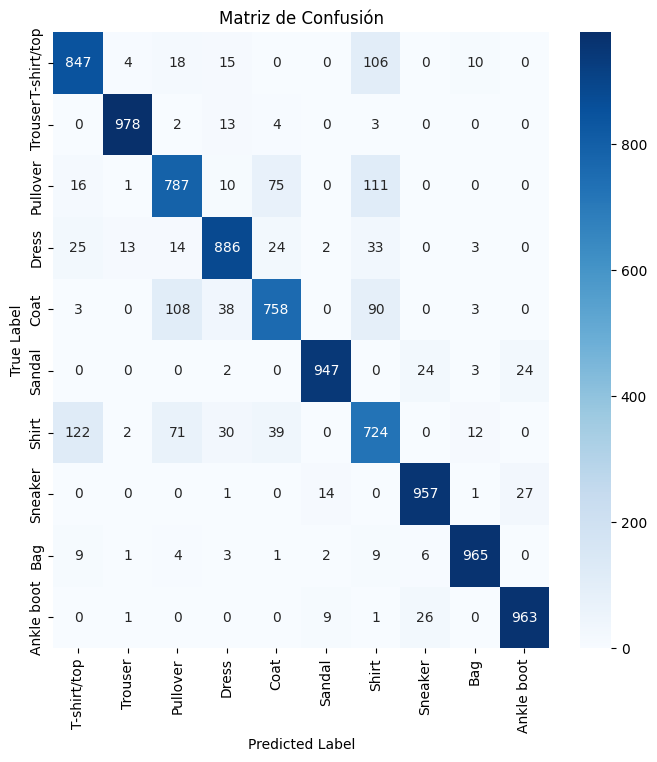

In [31]:
# Matriz de confusión
from sklearn.metrics import confusion_matrix
import itertools
cm = confusion_matrix(y_test, predicted_labels)
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Matriz de Confusión')
plt.show()

La matriz de confusión permite visualizar el desempeño del modelo en cada clase. Observamos que la mayoría de las predicciones se encuentran en la diagonal principal, lo que indica una buena precisión general. Sin embargo, existen confusiones entre clases similares, como "Shirt" y "T-shirt/top", o "Coat" y "Pullover", donde el modelo tiende a equivocarse más. Esto sugiere que las características visuales entre algunas prendas son difíciles de distinguir para la red neuronal. En resumen, el modelo logra una alta precisión, pero aún existen oportunidades de mejora en la diferenciación de clases con apariencia similar.

Finalmente, usamos el modelo entrenado para hacer una prediccion sobre una única imagen.